<a href="https://colab.research.google.com/github/DissapongNTH/Portfolio/blob/main/skillkamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive    
drive.mount('/content/drive')
path = '/content/drive/My Drive/Skillkamp'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_file_path = os.path.join(path,'Data_For_Question_Business_Case.csv')
data= pd.read_csv(data_file_path)    

In [ ]:
data

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Cost (US dollar),Quantity
0,1,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2
1,2,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3
2,3,6/12/2016,6/16/2016,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2
3,4,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5
4,5,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,5/21/2014,5/25/2014,Standard Class,Mitch Willingham,Corporate,United States,Virginia Beach,Virginia,South,Technology,Phones,617.9700,3
996,997,10/28/2015,11/3/2015,Standard Class,Rob Dowd,Consumer,United States,Henderson,Kentucky,South,Office Supplies,Envelopes,10.6700,1
997,998,10/28/2015,11/3/2015,Standard Class,Rob Dowd,Consumer,United States,Henderson,Kentucky,South,Office Supplies,Storage,36.6300,3
998,999,10/28/2015,11/3/2015,Standard Class,Rob Dowd,Consumer,United States,Henderson,Kentucky,South,Furniture,Furnishings,24.1000,5


In [ ]:
data.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Cost (US dollar)', 'Quantity'],
      dtype='object')

#1.1 แสดงค่า Descriptive statistics ต่าง ๆ ของชุดข้อมูล ตามความเหมาะสม


In [ ]:
data.describe()

,Row ID,Cost (US dollar),Quantity
count,1000.000000,1000.000000,1000.000000
mean,500.500000,241.130768,3.804000
std,288.819436,595.878568,2.269964
min,1.000000,1.080000,1.000000
25%,250.750000,18.378000,2.000000
50%,500.500000,55.740000,3.000000
75%,750.250000,213.206250,5.000000
max,1000.000000,8159.952000,14.000000


In [ ]:
data['Ship Mode'].value_counts()

Standard Class    586
Second Class      213
First Class       184
Same Day           17
Name: Ship Mode, dtype: int64

In [ ]:
data['Segment'].value_counts()

Consumer       547
Corporate      283
Home Office    170
Name: Segment, dtype: int64

In [ ]:
data['Region'].value_counts()

East       313
West       301
Central    245
South      141
Name: Region, dtype: int64

In [ ]:
data['City'].value_counts()

New York City    100
Philadelphia      71
Los Angeles       62
San Francisco     60
Chicago           35
                ... 
Redlands           1
Park Ridge         1
Carlsbad           1
Palm Coast         1
Murfreesboro       1
Name: City, Length: 174, dtype: int64

In [ ]:
data['State'].value_counts()

California        183
New York          135
Texas              92
Pennsylvania       79
Ohio               54
Illinois           52
Florida            42
Michigan           42
Washington         39
Colorado           35
Arizona            23
North Carolina     22
Minnesota          21
Kentucky           18
Virginia           18
New Jersey         16
Indiana            10
Tennessee          10
Wisconsin          10
Louisiana           9
Oregon              9
Georgia             8
Delaware            8
Iowa                8
Massachusetts       8
Connecticut         6
Mississippi         6
Utah                5
Nebraska            4
Montana             4
New Hampshire       4
Alabama             4
Missouri            3
Oklahoma            3
Arkansas            2
South Carolina      2
Rhode Island        2
New Mexico          2
Nevada              1
Maryland            1
Name: State, dtype: int64

In [ ]:
data['Category'].value_counts()

Office Supplies    603
Furniture          207
Technology         190
Name: Category, dtype: int64

In [ ]:
data['Sub-Category'].value_counts()

Binders        145
Paper          127
Storage         95
Furnishings     95
Phones          88
Accessories     83
Art             81
Chairs          58
Appliances      43
Labels          41
Tables          33
Envelopes       30
Fasteners       21
Bookcases       21
Supplies        20
Machines        13
Copiers          6
Name: Sub-Category, dtype: int64

In [ ]:
print(data.dtypes)

Row ID                int64
Order Date           object
Ship Date            object
Ship Mode            object
Customer Name        object
Segment              object
Country              object
City                 object
State                object
Region               object
Category             object
Sub-Category         object
Cost (US dollar)    float64
Quantity              int64
dtype: object


#1.3 กราฟหรือแผนภูมิที่แสดงสัดส่วนปริมาณ Shipping order ตามประเภทของสินค้า (Category)


In [ ]:
group_Category = data.groupby(['Category'])['Quantity'].sum().reset_index(name='Total')
group_Category = group_Category.sort_values('Total', ascending=False)
group_Category

,Category,Total
1,Office Supplies,2272
0,Furniture,798
2,Technology,734


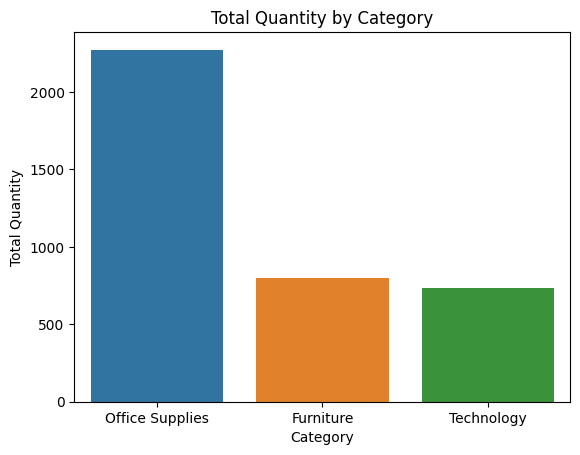

In [ ]:
sns.barplot(x='Category', y='Total', data=group_Category)
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Category')
plt.show()

#1.4 กราฟหรือแผนภูมิที่แสดงสัดส่วน Ship mode ที่ลูกค้าเลือกใช้ตามประเภทสินค้า (Category)


In [ ]:
group_Category_Mode = data.groupby(['Category', 'Ship Mode'])['Quantity'].sum().reset_index(name='Total')
group_Category_Mode

,Category,Ship Mode,Total
0,Furniture,First Class,100
1,Furniture,Same Day,20
2,Furniture,Second Class,155
3,Furniture,Standard Class,523
4,Office Supplies,First Class,433
5,Office Supplies,Same Day,30
6,Office Supplies,Second Class,472
7,Office Supplies,Standard Class,1337
8,Technology,First Class,142
9,Technology,Same Day,16


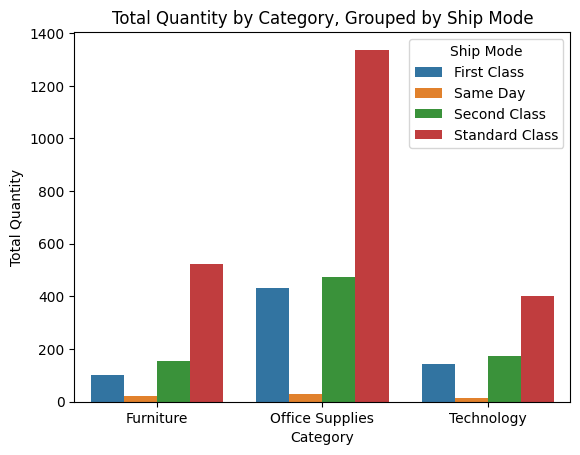

In [ ]:
sns.barplot(x='Category', y='Total', hue='Ship Mode', data=group_Category_Mode)
plt.title('Total Quantity by Category, Grouped by Ship Mode')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.show()

#1.5 กราฟหรือแผนภูมิที่แสดงช่วงเวลาที่ใช้ในการขนส่งของสินค้าแต่ละประเภท (Category

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

In [ ]:
data['date_diff'] = data['Ship Date'] - data['Order Date']
data['date_diff'] = data['date_diff'].dt.days

In [ ]:
group_Category_Mode = data.groupby(['Category', 'date_diff'])['Quantity'].sum().reset_index(name='Total')
group_Category_Mode

,Category,date_diff,Total
0,Furniture,0,20
1,Furniture,1,12
2,Furniture,2,136
3,Furniture,3,39
4,Furniture,4,231
5,Furniture,5,185
6,Furniture,6,121
7,Furniture,7,54
8,Office Supplies,0,30
9,Office Supplies,1,60


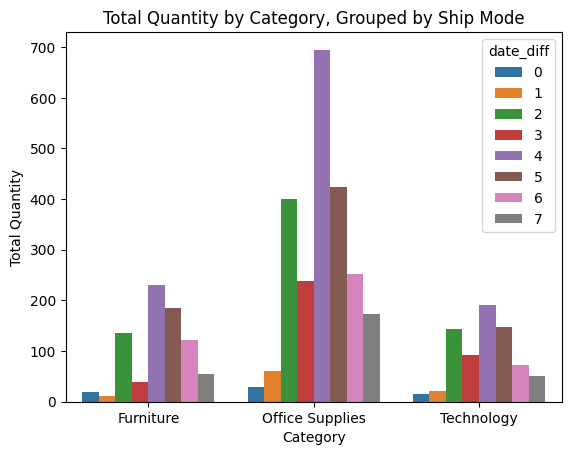

In [ ]:
sns.barplot(x='Category', y='Total', hue='date_diff', data=group_Category_Mode)
plt.title('Total Quantity by Category, Grouped by Ship Mode')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.show()

# 1.6. กราฟหรือแผนภูมิที่แสดงอัตราการเพิ่ม-ลดของยอด Shipping order รายปีแยกตามพื้นที่ (Region)


In [ ]:
data['year'] = data['Order Date'].dt.year.astype(int)

In [ ]:
data

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Cost (US dollar),Quantity,date_diff,year
0,1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,3,2016
1,2,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,3,2016
2,3,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,4,2016
3,4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,7,2015
4,5,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2014-05-21,2014-05-25,Standard Class,Mitch Willingham,Corporate,United States,Virginia Beach,Virginia,South,Technology,Phones,617.9700,3,4,2014
996,997,2015-10-28,2015-11-03,Standard Class,Rob Dowd,Consumer,United States,Henderson,Kentucky,South,Office Supplies,Envelopes,10.6700,1,6,2015
997,998,2015-10-28,2015-11-03,Standard Class,Rob Dowd,Consumer,United States,Henderson,Kentucky,South,Office Supplies,Storage,36.6300,3,6,2015
998,999,2015-10-28,2015-11-03,Standard Class,Rob Dowd,Consumer,United States,Henderson,Kentucky,South,Furniture,Furnishings,24.1000,5,6,2015


In [ ]:
year_Region = data.groupby(['year', 'Region'])['Quantity'].sum().reset_index(name='Total')
year_Region

,year,Region,Total
0,2014,Central,184
1,2014,East,254
2,2014,South,123
3,2014,West,293
4,2015,Central,225
5,2015,East,235
6,2015,South,130
7,2015,West,225
8,2016,Central,245
9,2016,East,389


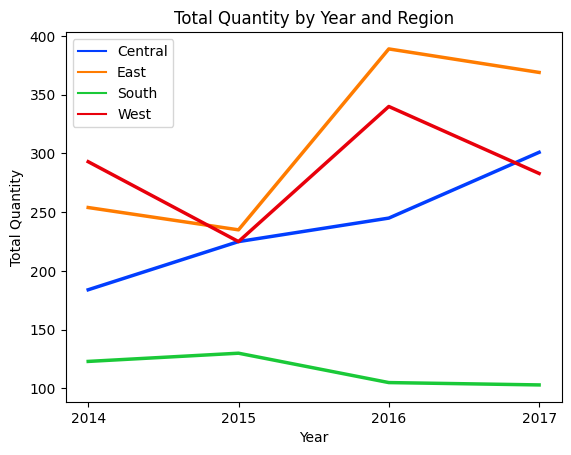

In [ ]:
sns.lineplot(data=year_Region, x='year', y='Total', hue='Region', linewidth=2.5, palette='bright')
plt.xlabel('Year') 
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Year and Region') 
plt.legend() 
plt.xticks(year_Region['year'].astype(int).unique())  
plt.show() 

In [ ]:
data.to_csv('data.csv', encoding = 'utf-8')